# Optimization Techniques for Python Code

Possible areas one can optimize:
  * Algorithm and data-structure
  * **Implementation**
  * Compiler Options
  * Operating System
  * Hardware

## Example: Calculate $\pi$ using a simple Monte Carlo algorithm

  1. Throw $N$ random coordinates $x, y \in [-1, 1]$
  2. Count the number of points  $N_\mathrm{hits}$ inside a unit circle $x^2 + y^2 < 1$
  3. Area of a unit circle / Area of phase-space is $\frac{\pi}{4}$
  4. $\pi \approx 4 \cdot \frac{N_\mathrm{hits}}{N}$

In [44]:
%matplotlib inline
def plot_pi_example(x, y):
    import numpy as np
    import matplotlib.pyplot as plt
    plt.scatter(x[:1000], y[:1000])
    X = np.linspace(0, 1, 100)
    circle = plt.Circle((0, 0), 1, color='r', lw=3, fill=False)
    plt.gca().add_artist(circle)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.axes().set_aspect('equal')

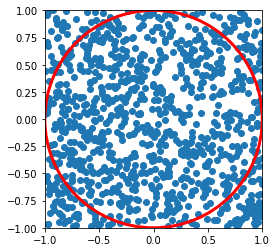

In [45]:
import array
from random import uniform
N = 10000000
x = array.array('f', [uniform(-1, 1) for i in range(N)])
y = array.array('f', [uniform(-1, 1) for i in range(N)])
plot_pi_example(x, y)

## Calculate $\pi$ using pure Python

In [42]:
def calculate_pi_with_pure_python(x, y, N):
    hits = 0
    for i in range(N):
        if (x[i]**2 + y[i]**2) < 1.0:
            hits += 1
    return hits * 4.0 / N

print("pi", calculate_pi_with_pure_python(x, y, N))
%timeit calculate_pi_with_pure_python(x, y, N)

pi 3.1415
1 loop, best of 3: 6.07 s per loop


## Calcualte $\pi$ using Cython

In [46]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [47]:
%%cython
def calculate_pi_with_cython(float[:] x, float[:] y, int N):
    cdef int hits = 0
    cdef int i = 0
    for i in xrange(N):
        if (x[i]**2 + y[i]**2) < 1.0:
            hits += 1
    return hits * 4.0 / N

In [48]:
print("pi", calculate_pi_with_cython(x, y, N))
%timeit calculate_pi_with_cython(x, y, N)

pi 3.141582
10 loops, best of 3: 43.1 ms per loop


## Calculate $\pi$ using Numba

In [25]:
import numba
@numba.jit
def calculate_pi_with_numba(x, y, N):
    hits = 0
    for i in range(N):
        if (x[i]**2 + y[i]**2) < 1.0:
            hits += 1
    return hits * 4.0 / N

print("pi", calculate_pi_with_numba(x, y, N))
%timeit calculate_pi_with_numba(x, y, N)

pi 3.1405956
100 loops, best of 3: 17.9 ms per loop


## Calculate $\pi$ using numpy

In [15]:
import numpy as np
nx = np.array(x)
ny = np.array(y)

def calculate_pi_with_numpy(x, y, N):
    hits = np.where((x**2 + y**2) < 1.0, 1.0, 0.0).sum()
    return hits * 4.0 / N

print("pi", calculate_pi_with_numpy(nx, ny, N))
%timeit calculate_pi_with_numpy(nx, ny, N)

pi 3.1405956
1 loop, best of 3: 253 ms per loop


## Calculate $\pi$ using numexpr

In [16]:
import numexpr
def calculate_pi_with_numexpr(x, y, N):
    hits = numexpr.evaluate("sum(where((x**2 + y**2)  < 1.0, 1.0, 0.0))")
    return hits * 4.0 / N

print("pi", calculate_pi_with_numexpr(nx, ny, N))
%timeit calculate_pi_with_numexpr(nx, ny, N)

pi 3.1405956
10 loops, best of 3: 125 ms per loop


## Calculate $\pi$ with theano

In [49]:
import theano
import theano.tensor as T
tx = T.fvector('x')
ty = T.fvector('y')
tN = T.iscalar('N')
pi_approx = T.sum(T.switch(tx**2 + ty**2 < 1.0, 1.0, 0.0)) * 4.0 / tN
calculate_pi_with_theano = theano.function([tx, ty, tN], pi_approx)

print("pi", calculate_pi_with_theano(nx, ny, N))
%timeit calculate_pi_with_theano(nx, ny, N)

pi 3.1405956
10 loops, best of 3: 106 ms per loop


## Exercise

Calculate the kurtosis of uniformely distributed random numbers: 
$$\frac{1}{N} \sum_{i=1}^N \left( \frac{x_i - \mu}{\sigma} \right)^4$$
where
$$\mu = \frac{1}{N} \sum_{i=1}^N x_i, \quad \quad \sigma^2 = \frac{1}{N-1} \sum_{i=1}^N \left(x_i - \mu\right)^2$$

Try out all methods shown above. Which one is the fastest? Which one produces the most readable code?